<a href="https://colab.research.google.com/github/darshit555/Python-Project/blob/main/Shopinsight360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

# drive.mount ('https://drive.google.com/drive/folders/1ssQoy0422wgvIRkjWGtqfPjYXBcWx0TM?usp=drive_link')

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('shopping_behavior_updated.csv')

df.head()
#df.columns


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Text(0.5, 1.0, 'Shopping Behaviour By Category')

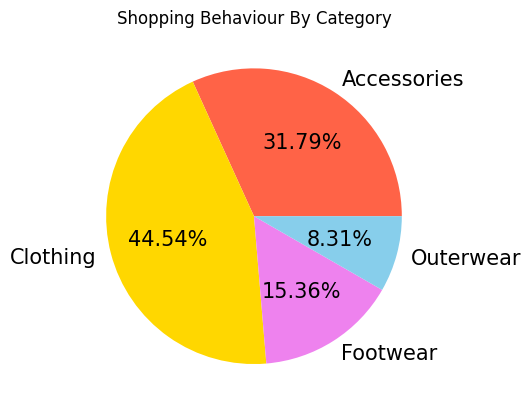

In [ ]:
df.groupby('Category').size().plot(kind='pie',  textprops={'fontsize':15}, autopct='%.2f%%',
                                  colors=['tomato', 'gold', 'violet','skyblue'])
plt.title('Shopping Behaviour By Category')

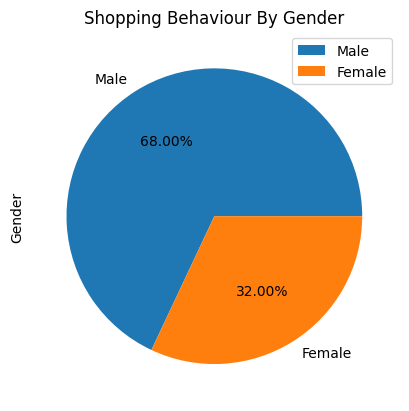

In [ ]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')

plt.title('Shopping Behaviour By Gender')
plt.legend()


Text(0.5, 1.0, 'Shopping Behaviour By Payment Method')

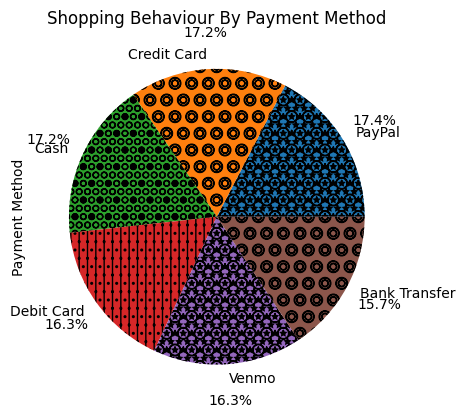

In [ ]:
df['Payment Method'].value_counts().plot(kind='pie',hatch=['**O', 'oO', 'O.O', '.||.'], autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=1.1)

plt.title('Shopping Behaviour By Payment Method')

Text(0.5, 1.0, 'Shopping Behaviour By Frequency of Purchase')

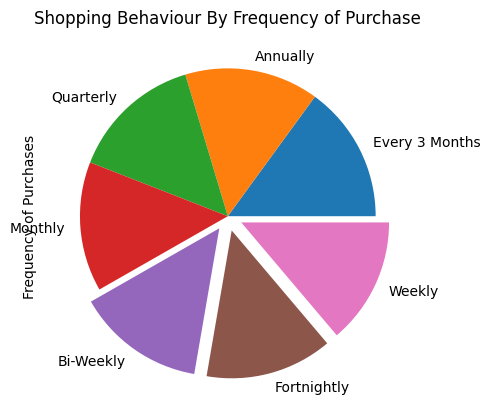

In [ ]:
explode = (0, 0, 0,0,0.1,0.1,0.1)
df['Frequency of Purchases'].value_counts().plot(kind='pie',explode=explode)
plt.title('Shopping Behaviour By Frequency of Purchase')

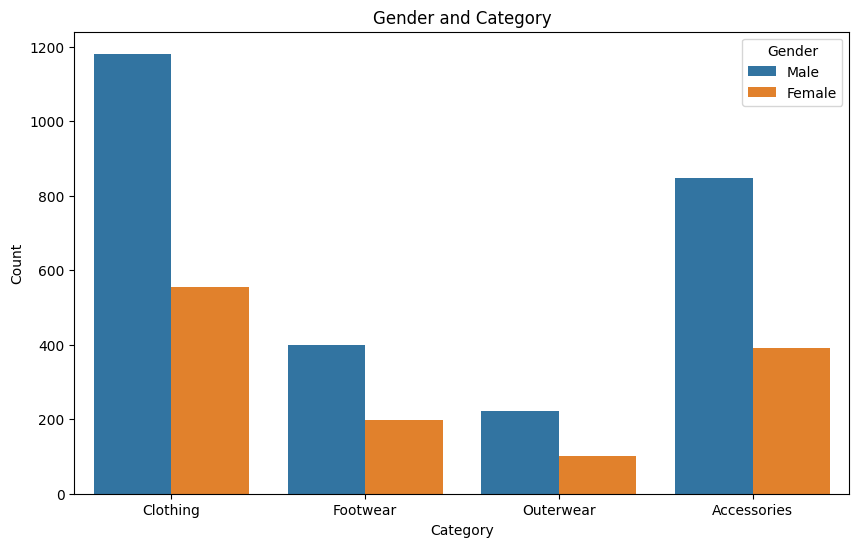

In [ ]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Gender', data=df)
plt.title('Gender and Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# # Scatter plot with regression line
# plt.figure(figsize=(12, 6))
# sns.regplot(x='Age', y='Purchase Amount (USD)', data=df)
# plt.title('Scatter Plot with Regression Line - Age vs Purchase Amount')
# plt.xlabel('Age')
# plt.ylabel('Purchase Amount (USD)')
# plt.show()

# # Pair plot with regression lines
# sns.pairplot(df, vars=['Age', 'Purchase Amount (USD)'], kind='reg', height=4)
# plt.suptitle('Pair Plot with Regression Lines', y=1.02)
# plt.show()


In [ ]:
!pip install folium geopy


In [ ]:
df=pd.read_csv('shopping_behavior_updated.csv')

df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [ ]:
from geopy.geocoders import Nominatim
from IPython.display import HTML


In [ ]:
#Visualizing Geospatial Data - Folium, maps with markers & Choropleth maps


df_head = df.head(20)

# Initialize a geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Add latitude and longitude columns to the DataFrame
df_head['Coordinates'] = df_head['Location'].apply(lambda x: geolocator.geocode(x) if x else None)
df_head['Latitude'] = df_head['Coordinates'].apply(lambda x: x.latitude if x else None)
df_head['Longitude'] = df_head['Coordinates'].apply(lambda x: x.longitude if x else None)

# Create a base map with markers
map_center = [df_head['Latitude'].mean(), df_head['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=4)

marker_cluster = MarkerCluster().add_to(my_map)

# Add markers to the map
for index, row in df_head.dropna(subset=['Latitude', 'Longitude']).iterrows():
    popup_text = f"Location: {row['Location']}<br>Category: {row['Category']}<br>Purchase Amount: {row['Purchase Amount (USD)']}"
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup_text).add_to(marker_cluster)

# Save the map with markers to an HTML file
my_map.save("map_with_markers.html")

# Display the HTML file in Colab
HTML(filename="map_with_markers.html")

<ipython-input-20-be73936599cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['Coordinates'] = df_head['Location'].apply(lambda x: geolocator.geocode(x) if x else None)
<ipython-input-20-be73936599cb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['Latitude'] = df_head['Coordinates'].apply(lambda x: x.latitude if x else None)
<ipython-input-20-be73936599cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index